In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
# 1. 데이터 셋
dataset_01 = anscombe[anscombe['dataset']=='I']
dataset_02 = anscombe[anscombe['dataset']=='II']
dataset_03 = anscombe[anscombe['dataset']=='III']
dataset_04 = anscombe[anscombe['dataset']=='IV']

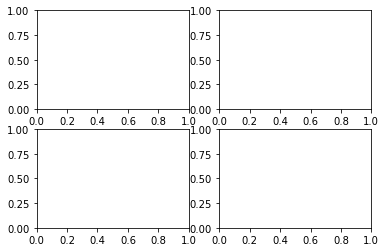

In [4]:
#그래프 격자가 위치할 기본 틀 설정
fig = plt.figure()
#그래프 격자 그리기
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

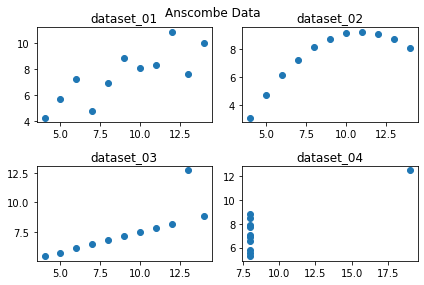

In [5]:
#plot 메서드에 데이터를 전달하여 그래프 그리기
axes1.plot(dataset_01['x'],dataset_01['y'],'o')
axes1.set_title('dataset_01')

axes2.plot(dataset_02['x'],dataset_02['y'],'o')
axes2.set_title('dataset_02')

axes3.plot(dataset_03['x'],dataset_03['y'],'o')
axes3.set_title('dataset_03')

axes4.plot(dataset_04['x'],dataset_04['y'],'o')
axes4.set_title('dataset_04')

fig.suptitle('Anscombe Data')
#그래프 사이의 레이아웃 조절
fig.tight_layout()
fig

In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

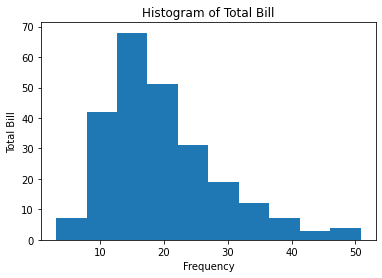

In [8]:
#데이터 프레임의 열 데이터 분포와 빈도를 살표보기 위해 히스토그램을 그려본다.
fig = plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

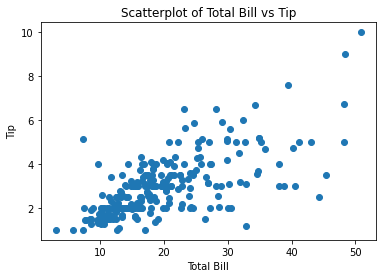

In [9]:
#이변량 그래프? 2개의 변수를 사용한 그래프, 통계학에선느 산점도 라고한다.
#TotalBill 에 따른 tip 열의 분포를 나타내보도록 한다.
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

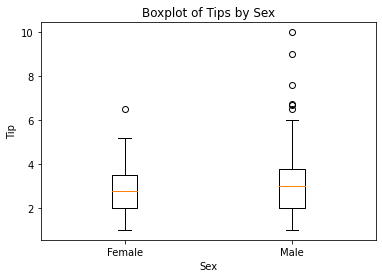

In [10]:
#이산형 변수? 남성,여성 과같이 명확하게 구분되는값
#연속형 변수? 명확하게 셀 수 없는 범위의 값
#박스 그래프: 이산형 변수와 연속형 변수를 함께 사용하는 그래프

boxplot = plt.figure()
axes1=boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
               labels=['Female','Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

Text(0, 0.5, 'Tip')

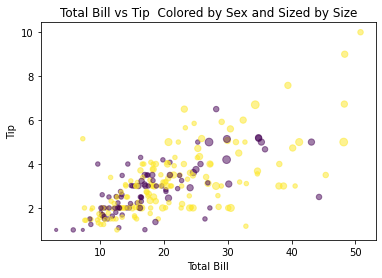

In [11]:
#3개이상의 변수를 사용한 그래프는 ? 다변량 그래프

#Tipbill, tip 외 성별을 추가하여 다변량 산점도 를 그려본다.
#성별에 따라 그래프 색상 구분
def recode_sex(sex):
    if sex =='Female':
        return 0
    return 1
    
tips['sex_color'] = tips['sex'].apply(recode_sex)
scatter_plot = plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5
)
axes1.set_title('Total Bill vs Tip  Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

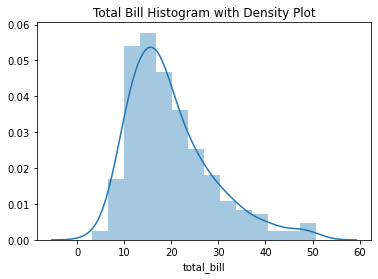

In [12]:
#seaborn 으로 히스토그램 그래기
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

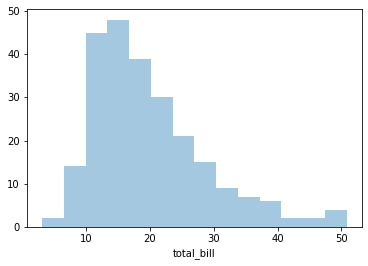

In [13]:
#위 그래프에서 밀집도 그래프를 제외하려면 kde 값을 False 로 설정해야한다. 
ax = sns.distplot(tips['total_bill'],kde=False)

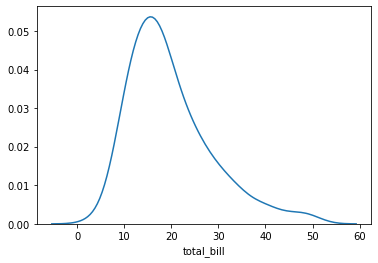

In [14]:
#밀집도 그래프만 남기려면? hist 인자를 False
ax = sns.distplot(tips['total_bill'],hist=False)

Text(0, 0.5, 'Frequency')

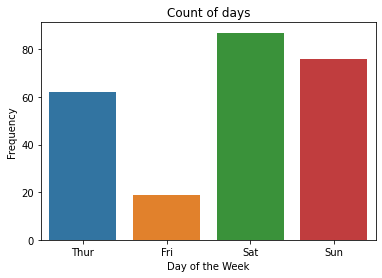

In [15]:
#count graph: 이산값을 나타낸 그래프이다. 
ax = plt.subplots()
ax = sns.countplot('day',data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Tip')

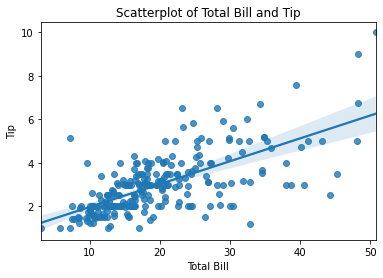

In [16]:
#산점도 그래프와 회귀선 그리기
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y ='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

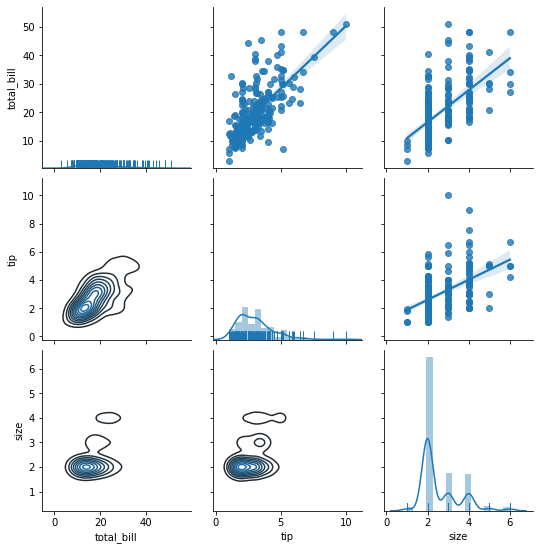

In [17]:
#관계 그래프
#pairplot 메서드 사용
tips = sns.load_dataset('tips')
pair_grid=sns.PairGrid(tips)
pair_grid=pair_grid.map_upper(sns.regplot) #
pair_grid=pair_grid.map_lower(sns.kdeplot)
pair_grid=pair_grid.map_diag(sns.distplot,rug=True)
plt.show()

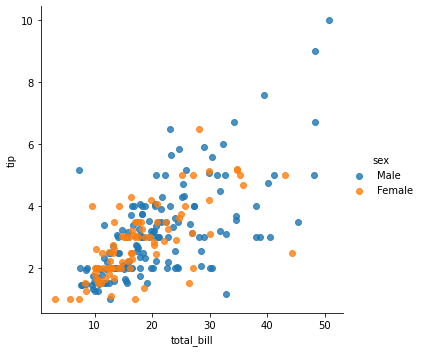

In [18]:
#산점도 , 관계그래프 그리기 - 색상 추가
scatter = sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',fit_reg=False)

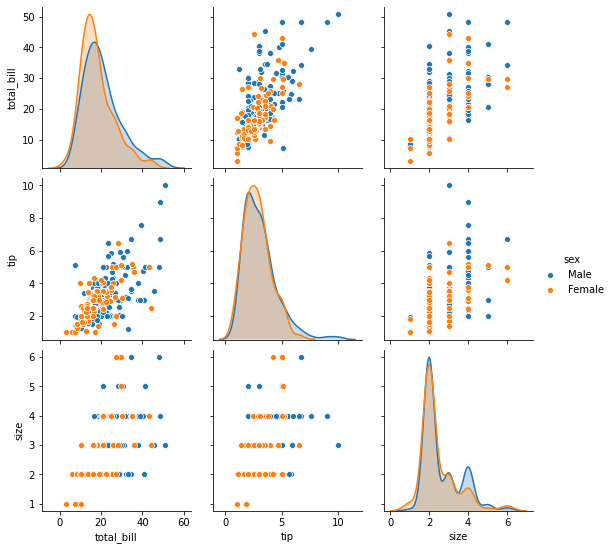

In [50]:
fig = sns.pairplot(tips,hue='sex')